In [38]:
# !pip install pyvi

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models, callbacks, preprocessing, utils

from function.preprocessing import NormalizeText
from src.dtprocess import cleandt

In [40]:
# from google.colab import drive
# drive.mount('/content/drive')

In [41]:
# %cd /content/drive/My Drive/School/Năm 3/DataMining/FinalTerm

In [42]:
# %ls

## Import data from source

In [43]:
vnexpress = pd.read_csv('./data/vnexpress/csv/cleaned_vnexpress.csv').drop(columns=['Unnamed: 0'], axis=1)
vnexpress.shape

(2481, 6)

In [44]:
vnexpress.head()

,article_id,topic,sub-topic,title,url,tag
0,0,doi-song,to-am,Bức tường hoa hồng bao quanh nhà người phụ nữ ...,https://vnexpress.net/buc-tuong-hoa-hong-bao-q...,khi mua ngôi nhà mới ở bắc california cả mảnh ...
1,1,doi-song,to-am,Vợ phát hiện từng dự đám cưới của chồng năm 9 ...,https://vnexpress.net/vo-phat-hien-tung-du-dam...,cô gái 24 tuổi ở quần_đảo bangkabelitung indon...
2,2,doi-song,to-am,70 ngày kéo vợ và con trở về từ cõi chết,https://vnexpress.net/70-ngay-keo-vo-va-con-tr...,mọi thứ ập đến với anh quá nhanh khoảng 7h sán...
3,3,doi-song,to-am,Những đứa trẻ được 'bật đèn xanh' yêu sớm,https://vnexpress.net/nhung-dua-tre-duoc-bat-d...,mẹ bảo hồi bằng tuổi cháu cũng yêu một bạn cùn...
4,4,doi-song,to-am,Đời bi kịch của người phụ nữ gánh cả gia đình,https://vnexpress.net/doi-bi-kich-cua-nguoi-ph...,tôi suy_sụp đứng không vững nhưng phải tự trấn...


In [45]:
mask = vnexpress['tag'].isna()
vnexpress[mask]

,article_id,topic,sub-topic,title,url,tag
117,117,doi-song,bai-hoc-song,NaN,https://vnexpress.net/lan-dau-di-vay-khoi-nghi...,NaN
355,355,doi-song,tieu-dung,NaN,https://vnexpress.net/hanh-trinh-8-nam-acecook...,NaN


In [46]:
vnexpress.dropna(axis=0, inplace=True)
vnexpress['topic'].value_counts()

topic
giai-tri    616
the-thao    510
khoa-hoc    450
doi-song    363
giao-duc    358
du-lich     182
Name: count, dtype: int64

In [47]:
news = vnexpress.copy()
label_encoder = LabelEncoder()
news['topic'] = label_encoder.fit_transform(vnexpress['topic'])
news['tag'] = news['tag'].apply(lambda x: cleandt.remove_stopword(x, './data/vietnamese-stopwords-dash.txt'))

news.head()

,article_id,topic,sub-topic,title,url,tag
0,0,0,to-am,Bức tường hoa hồng bao quanh nhà người phụ nữ ...,https://vnexpress.net/buc-tuong-hoa-hong-bao-q...,mua bắc california mảnh vườn 670 m2 cây_xanh d...
1,1,0,to-am,Vợ phát hiện từng dự đám cưới của chồng năm 9 ...,https://vnexpress.net/vo-phat-hien-tung-du-dam...,gái 24 quần_đảo bangkabelitung indonesia tình ...
2,2,0,to-am,70 ngày kéo vợ và con trở về từ cõi chết,https://vnexpress.net/70-ngay-keo-vo-va-con-tr...,ập 7h 143 chiến bật dậy tiếng kêu vợ cử_động c...
3,3,0,to-am,Những đứa trẻ được 'bật đèn xanh' yêu sớm,https://vnexpress.net/nhung-dua-tre-duoc-bat-d...,mẹ bảo hồi cháu yêu lớp yêu tâm_trạng cháu bé ...
4,4,0,to-am,Đời bi kịch của người phụ nữ gánh cả gia đình,https://vnexpress.net/doi-bi-kich-cua-nguoi-ph...,suy_sụp đứng vững trấn_an dựa sen 60 xã kim li...


## Initialize the corpus

In [ ]:
normalizer = NormalizeText()

In [52]:
sequences = normalizer.create_sequences(news)
print('Length of sequences:', len(sequences))
sequences[2]

  0%|          | 0/2479 [00:00<?, ?it/s]

100%|██████████| 2479/2479 [00:14<00:00, 167.54it/s]

Length of sequences: 2479


'ập 7h 143 chiến bật dậy tiếng kêu vợ cử_động cứu vợ phí thị trang 20 ngủ dậy đi vệ_sinh đột_nhiên đau_đầu cố bò giường gọi chồng xong ngã bất_tỉnh gia_đình vội trang bệnh_viện bệnh_viện bạch mai 13 chiều bác_sĩ thông_báo sống não dấu_hiệu sống bé bụng tương_tự đại_gia_đình nội ngoại 30 đứng phòng cấp_cứu tai tưởng trang_bị ngất canxi máu não thai kỳ nghiêm_trọng bác_sĩ xong tiếng khóc vỡ òa mổ tỷ_lệ sống 10 sống khả_năng thực_vật bác_sĩ thông_báo tiếp chiến hai trang kêu đau_đầu sức_khỏe yếu đi gia_đình chủ_quan bầu sức_khỏe yếu bình_thường dị_dạng mạch_máu não bẩm_sinh bầu áp_lực máu nuôi hai mẹ máu não xuất_huyết não chiến gia_đình quyết_tâm mổ giành 10 sống_còn nỗi đau ký tờ giấy sinh_tử vợ_con_người chồng 26 quê đồng quang huyện quốc oai hà_nội ký xong chiến góc gạt nước_mắt kỷ_niệm dự_định hai vợ_chồng đau yêu đồng_hành tay_trắng chốt đơn kia đóng hàng thâu đêm chiến rơi nợ_nần trang động_viên làm_chủ doanh_nghiệp phân_phối sản_phẩm thủ_công tre hạnh_phúc viên mãn lễ cưới dịp 202

In [53]:
input_sequences = normalizer.word_separation(sequences)
print(input_sequences[0:2])

[['mua', 'bắc', 'california', 'mảnh', 'vườn', '670', 'm2', 'cây_xanh', 'diệp', 'thục_my', '50', 'biến', 'thành', 'khu', 'vườn', 'cổ_tích', 'mơ_ước', 'bé', 'mua', 'bắc', 'california', 'mảnh', 'vườn', '670', 'm2', 'cây_xanh', 'diệp', 'thục_my', '50', 'biến', 'thành', 'khu', 'vườn', 'cổ_tích', 'mơ_ước', 'bé', 'đầu', '2022', 'ý_tưởng', 'khu', 'vườn', 'đam_mê', 'hồng', 'leo', 'dựng', 'hàng_rào', 'màu', 'trắng', 'xung_quanh', 'trồng', 'gốc', 'hồng', 'cạnh', 'gốc', '12', 'mét', 'mê', 'hồng', 'leo', 'cảm_giác', 'hoa', 'bao_bọc', 'không_gian', 'sống', 'người_ta', 'lãng_mạn', 'bình_yên', 'thục', 'my', 'đầu', '2022', 'ý_tưởng', 'khu', 'vườn', 'đam_mê', 'hồng', 'leo', 'dựng', 'hàng_rào', 'màu', 'trắng', 'xung_quanh', 'trồng', 'gốc', 'hồng', 'cạnh', 'gốc', '12', 'mét', 'mê', 'hồng', 'leo', 'cảm_giác', 'hoa', 'bao_bọc', 'không_gian', 'sống', 'người_ta', 'lãng_mạn', 'bình_yên', 'thục', 'my', 'vườn', 'đường', 'rải', 'đá', 'hệ_thống', 'tưới', 'tự_động', 'đèn', 'tiện', 'đi_lại', 'chăm_sóc', 'hồng', 'đêm

In [54]:
# filter several punctuations in 50803 sentences
tokenizer = preprocessing.text.Tokenizer(filters='!“"”#$%&()*+,-./:;<=>?@[\]^`{|}~ ', oov_token='<oov>')
# create vocabulary (corpus) for each word in 50803 sentences
tokenizer.fit_on_texts(input_sequences)

print(len(tokenizer.word_index))

38517


In [55]:
max_length = max([len(i) for i in sequences])
max_length

10155

In [56]:
topic_size = len(news['topic'].unique()) + 1
topic_size

7

## Split into train and test

In [57]:
X = news[['article_id', 'tag']]
y = news[['topic']]
news_train, news_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [58]:
print("The length of news_train: ", len(news_train))
print("The length of news_test: ", len(news_test))

The length of news_train:  1983
The length of news_test:  496


In [59]:
print(label_train.value_counts())
print(label_test.value_counts())

topic
2        493
5        397
4        363
0        301
3        277
1        152
Name: count, dtype: int64
topic
2        123
5        113
4         87
3         81
0         62
1         30
Name: count, dtype: int64


In [60]:
normalizer.tokenizer = tokenizer
normalizer.max_length = max_length

sequences_train = normalizer.create_sequences(news_train)
X_train = normalizer.create_input(sequences_train)

print(len(X_train))
print(X_train[0:2])

  0%|          | 0/1983 [00:00<?, ?it/s]

100%|██████████| 1983/1983 [00:13<00:00, 152.06it/s]


[6246, 829, 2500, 76, 2046, 6429, 2867, 114, 208, 1599, 954, 122, 829, 286, 1895, 908, 248, 820, 3085, 22, 339, 3563, 1344, 9498, 3200, 130, 742, 36, 507, 749, 502, 19228, 4, 526, 1960, 98, 129, 245, 18882, 20169, 30268, 8, 1766, 3027, 43, 4675, 23, 1732, 3606, 759, 1021, 245, 8797, 164, 1960, 3782, 405, 138, 3563, 405, 3, 98, 129, 608, 245, 1766, 326, 5544, 689, 122, 5, 3300, 617, 335, 99, 10987, 513, 291, 557, 1634, 6674, 1960, 10606, 15721, 664, 245, 23, 83, 6215, 130, 83, 1960, 1130, 122, 83, 626, 4, 7329, 86, 3175, 8622, 5566, 1954, 1609, 11574, 2539, 413, 7646, 23, 147, 142, 11021, 83, 397, 130, 259, 3338, 1963, 978, 217, 847, 363, 114, 208, 1599, 1003, 1963, 30269, 1001, 83, 15219, 11681, 212, 3346, 1299, 1324, 9400, 2594, 122, 2867, 114, 208, 1599, 83, 2181, 526, 1960, 11076, 11616, 4938, 23, 83, 519, 4061, 122, 23, 1732, 9498, 9343, 114, 208, 1599, 68, 9625, 365, 5180, 450, 18, 1912, 134, 1089, 134, 18, 100, 165, 3922, 78, 82, 11724, 44, 245, 1195, 4277, 667, 114, 208, 1599, 4

In [61]:
## Sửa định dạng y
y_train = np.array([label_train['topic']])
y_train = y_train.reshape(-1, 1)
y_train = utils.to_categorical(y_train, num_classes=topic_size)

print(y_train[0:5])

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


## Design the LSTM model

In [62]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

38518

In [63]:
drop_out = 0.2
output_unit = topic_size
embedding_size = 128

In [64]:
model = models.Sequential([
  layers.Embedding(vocab_size, embedding_size),
  layers.BatchNormalization(),
  layers.LSTM(64, return_sequences=True),
  layers.LSTM(64, return_sequences=True),
  layers.LSTM(64),
  layers.Dropout(drop_out),
  layers.Dense(9, activation='relu'),
  layers.Dense(9, activation='relu'),
  layers.Dense(9, activation='relu'),
  layers.Dense(9, activation='relu'),
  layers.Dense(units=output_unit, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         4930304   
                                                                 
 batch_normalization (Batch  (None, None, 128)         512       
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 (None, None, 64)          49408     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
# model.fit(X_train, y_train, epochs=20, batch_size=64)

## Dump model into files

In [67]:
# %cd /content/drive/My Drive/School/Năm 3/DataMining/FinalTerm/model

In [68]:
import pickle
model.save('./model/text_classify_model.h5')

with open('./model/text_classify_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

d:\Programming\Vietnamese-Text-Generator\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predict samples and Evaluate on test dataset

In [75]:
import pickle
model = models.load_model('./model/text_classify_model.h5')

with open('./model/text_classify_tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

* Predict a sample

In [71]:
sample_text = '''
chiến_thắng giúp leverkusen nới rộng khoảng_cách với đội nhì bảng bayern lên tám điểm tạo áp_lực cho đối_thủ trước chuyến làm_khách trên sân bochum vào tối 182 leverkusen vẫn chưa thua trận nào mùa này họ đã bất_bại 32 trận liên_tiếp trên mọi đấu_trường
'''

In [77]:
tokeninzed_sequences = normalizer.normalize(sample_text)
temp  = normalizer.create_input(tokeninzed_sequences)
print(temp)

prediction = model.predict(temp)
print(prediction)

[[   0    0    0 ...    1    1 2257]]
1/1 [==============================] - 4s 4s/step
[[1.8311549e-02 4.6005430e-06 1.7284302e-11 4.1136104e-07 6.3665416e-03
  9.7531676e-01 3.9073272e-10]]


In [78]:
result = label_encoder.inverse_transform([np.argmax(prediction[0])])
result

array(['the-thao'], dtype=object)

* Evaluate performance

In [79]:
sequences_test = normalizer.create_sequences(news_test)
X_test = normalizer.create_input(sequences_test)

print(len(X_test))
print(X_test[0:2])

100%|██████████| 496/496 [00:03<00:00, 163.27it/s]


[2, 2065, 262, 1892, 109, 1031, 6229, 2, 298, 9, 262, 171, 3758, 171, 1667, 21, 7783, 6955, 97, 9259, 345, 745, 3147, 1031, 4699, 2571, 298, 1167, 561, 154, 50, 9697, 320, 1328, 2194, 13954, 2462, 9020, 1892, 102, 9, 262, 171, 1667, 687, 2462, 9020, 65, 879, 282, 3480, 4303, 1376, 1031, 50, 9, 262, 92, 4280, 2321, 3379, 636, 6183, 5161, 6934, 5509, 11442, 16652, 15, 448, 8983, 10892, 20130, 6485, 7877, 1159, 11904, 10937, 7300, 16650, 9896, 15, 403, 298, 1031, 4730, 12102, 614, 1350, 636, 265, 29, 4877, 609, 37974, 37975, 2571, 1452, 298, 2, 2321, 65, 30, 1362, 12964, 8856, 3505, 37976, 22765, 22766, 13106, 37977, 422, 1031, 1892, 1658, 636, 9, 88, 1385, 660, 1192, 13955, 13956, 559, 14145, 52, 9072, 404, 265, 4278, 1825, 22786, 14155, 298, 265, 728, 16230, 22787, 298, 2, 22787, 3982, 1892, 10610, 265, 1925, 536, 21825, 1371, 3871, 298, 2, 1137, 1892, 7907, 1826, 8264, 1031, 3871, 1892, 265, 1328, 1442, 29, 13952, 13953, 298, 26, 1191, 49, 52, 37978, 37979, 1747, 2714, 4278, 5158, 298,

In [80]:
prediction = model.predict(X_test)
print(prediction)

16/16 [==============================] - 84s 5s/step
[[1.91455577e-02 4.68821281e-06 1.82058812e-11 ... 5.59302885e-03
  9.75256443e-01 3.77055276e-10]
 [4.00550962e-05 9.60173260e-04 9.98312354e-01 ... 7.25348226e-09
  2.07723994e-11 1.66163801e-11]
 [8.13380902e-05 3.15219443e-03 9.94704545e-01 ... 3.09249764e-08
  1.47599336e-10 1.10162435e-10]
 ...
 [1.88495796e-02 4.66905840e-06 1.79565772e-11 ... 5.86285861e-03
  9.75282550e-01 3.83474030e-10]
 [7.00510014e-03 1.76630001e-05 1.51603068e-08 ... 9.74231899e-01
  1.84123702e-02 2.11393711e-08]
 [5.24754396e-05 8.32792779e-04 9.98517454e-01 ... 6.90708735e-09
  1.94872243e-11 9.90106781e-12]]


In [84]:
predictions = [np.argmax(pred) for pred in prediction]
print(mean_squared_error(label_test, predictions))

0.2560483870967742


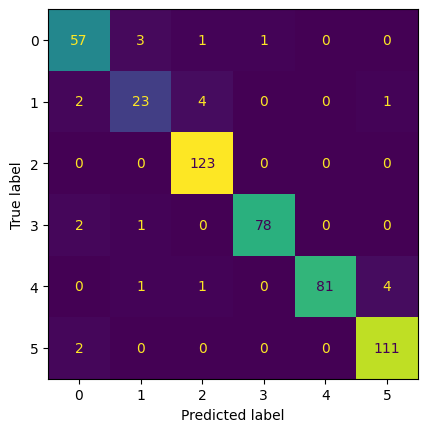

In [82]:
cm = confusion_matrix(label_test, predictions)
cfm = ConfusionMatrixDisplay(confusion_matrix=cm)
cfm.plot(colorbar=False)

In [83]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        62
           1       0.82      0.77      0.79        30
           2       0.95      1.00      0.98       123
           3       0.99      0.96      0.97        81
           4       1.00      0.93      0.96        87
           5       0.96      0.98      0.97       113

    accuracy                           0.95       496
   macro avg       0.94      0.93      0.93       496
weighted avg       0.95      0.95      0.95       496

